In [1]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# сгенерируем датасет
data, target, coef = datasets.make_regression(n_samples=1500, n_features = 2, n_informative = 2, n_targets = 1, 
                                              noise = 3, coef = True, random_state = 5)

In [3]:
# Получим средние значения и стандартное отклонение по столбцам

means = np.mean(data, axis=0)
stds = np.std(data, axis=0)
# параметр axis указывается для вычисления значений по столбцам, а не по всему массиву
#(см. документацию в разделе источников)

# вычтем каждое значение признака из среднего и поделим на стандартное отклонение
for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        data[i][j] = (data[i][j] - means[j])/stds[j]

In [4]:
# реализуем функцию, определяющую среднеквадратичную ошибку
def mserror(X, w, y_pred):
    y = X.dot(w)
    return (sum((y - y_pred)**2)) / len(y)

In [5]:
# ГРАДИЕНТНЫЙ СПУСК

# инициализируем начальный вектор весов
w1 = np.zeros(2)

# список векторов весов после каждой итерации
w_list1 = [w1.copy()]

# список значений ошибок после каждой итерации
errors1 = []

# шаг градиентного спуска
eta1 = 0.1

# максимальное число итераций
max_iter1 = 1e3

# критерий сходимости (разница весов, при которой алгоритм останавливается)
min_weight_dist1 = 1e-8

# зададим начальную разницу весов большим числом
weight_dist1 = np.inf

# счетчик итераций
iter_num1 = 0

# ход градиентного спуска
while weight_dist1 > min_weight_dist1 and iter_num1 < max_iter1:
    new_w1 = w1 - 2 * eta1 * np.dot(data.T, (np.dot(data, w1) - target)) / target.shape[0]
    weight_dist1 = np.linalg.norm(new_w1 - w1, ord=2)
    
    w_list1.append(new_w1.copy())
    errors1.append(mserror(data, new_w1, target))
    
    
    iter_num1 += 1
    w1 = new_w1
    
w_list1 = np.array(w_list1)

print(f'В случае использования градиентного спуска функционал ошибки составляет {round(errors1[-1], 4)}')

В случае использования градиентного спуска функционал ошибки составляет 9.6068


In [6]:
# СТОХАСТИЧЕСКИЙ ГРАДИЕНТНЫЙ СПУСК

# инициализируем начальный вектор весов
w = np.zeros(2)

# список векторов весов после каждой итерации
w_list = [w.copy()]

# список значений ошибок после каждой итерации
errors = []

# шаг градиентного спуска
eta = 0.2

# максимальное число итераций
max_iter = 1e5

# критерий сходимости (разница весов, при которой алгоритм останавливается)
min_weight_dist = 1e-8

# зададим начальную разницу весов большим числом
weight_dist = np.inf

# счетчик итераций
iter_num = 0

np.random.seed(1234)

# ход градиентного спуска
while weight_dist > min_weight_dist and iter_num < max_iter:
    
    # генерируем случайный индекс объекта выборки
    train_ind = np.random.randint(data.shape[0])
    
    new_w = w - 2 * eta * np.dot(data[train_ind].T, (np.dot(data[train_ind], w) - target[train_ind])) / target.shape[0]

    weight_dist = np.linalg.norm(new_w - w, ord=2)
    
    w_list.append(new_w.copy())
    errors.append(mserror(data, new_w, target))
    
    iter_num += 1
    w = new_w
    
w_list = np.array(w_list)

print(f'В случае использования стохастического градиентного спуска функционал ошибки составляет {round(errors[-1], 4)}')

В случае использования стохастического градиентного спуска функционал ошибки составляет 9.6087


In [ ]:
print(target[3])

In [ ]:
print(target.shape[0])

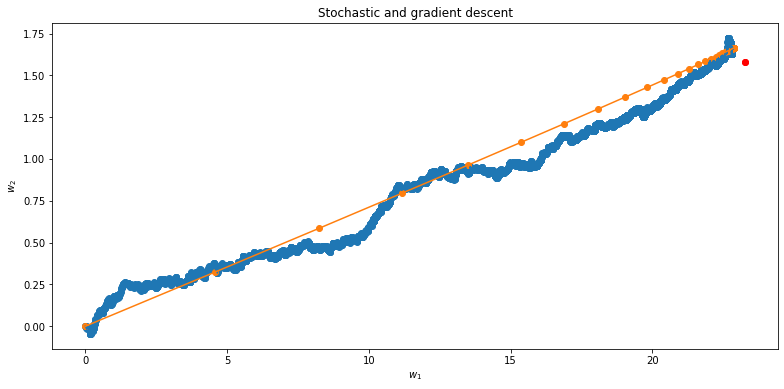

In [7]:
plt.figure(figsize=(13, 6))
plt.title('Stochastic and gradient descent')
plt.xlabel(r'$w_1$')
plt.ylabel(r'$w_2$')

plt.scatter(w_list[:, 0], w_list[:, 1])
plt.scatter(coef[0], coef[1], c='r')
plt.plot(w_list[:, 0], w_list[:, 1])

plt.scatter(w_list1[:, 0], w_list1[:, 1])
plt.scatter(coef[0], coef[1], c='r')
plt.plot(w_list1[:, 0], w_list1[:, 1])

plt.show()

Text(0, 0.5, 'MSE')

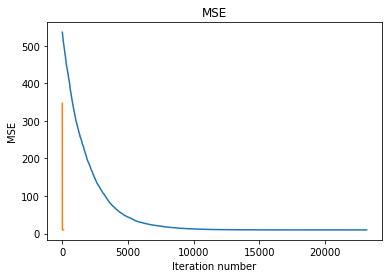

In [8]:
# Визуализируем изменение функционала ошибки
plt.plot(range(len(errors)), errors)
plt.plot(range(len(errors1)), errors1)
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')

### Вывод: в данном конкретном случае обычный градиентный спуск сработал быстрее, даже при равном количестве итераций. Мной были подобраны числа шага и итераций такие, чтобы ошибка была одинакова. Я делаю вывод такой, что стохастический градиентный спуск хорош в случаях очень большого количества значений.

### Задание 2

In [9]:
# ГРАДИЕНТНЫЙ СПУСК и L2 - регуляризация

# Lambda

lmbd1 = 1e-5


# инициализируем начальный вектор весов
w1 = np.zeros(2)

# список векторов весов после каждой итерации
w_list1 = [w1.copy()]

# список значений ошибок после каждой итерации
errors1 = []

# шаг градиентного спуска
eta1 = 0.1

# максимальное число итераций
max_iter1 = 1e3

# критерий сходимости (разница весов, при которой алгоритм останавливается)
min_weight_dist1 = 1e-8

# зададим начальную разницу весов большим числом
weight_dist1 = np.inf

# счетчик итераций
iter_num1 = 0

# ход градиентного спуска
while weight_dist1 > min_weight_dist1 and iter_num1 < max_iter1:
    new_w1 = w1 - 2 * eta1 * np.dot(data.T, (np.dot(data, w1) - target)) / target.shape[0] + lmbd1 * new_w1
    weight_dist1 = np.linalg.norm(new_w1 - w1, ord=2)
    
    w_list1.append(new_w1.copy())
    errors1.append(mserror(data, new_w1, target))
    
    
    iter_num1 += 1
    w1 = new_w1
    
w_list1 = np.array(w_list1)

print(f'В случае использования градиентного спуска и L2-регуляризации функционал ошибки составляет {round(errors1[-1], 4)}')

В случае использования градиентного спуска и L2-регуляризации функционал ошибки составляет 9.6068


In [10]:
# СТОХАСТИЧЕСКИЙ ГРАДИЕНТНЫЙ СПУСК и L2 - регуляризация

# Lambda

lmbd = 1e-50

# инициализируем начальный вектор весов
w = np.zeros(2)

# список векторов весов после каждой итерации
w_list = [w.copy()]

# список значений ошибок после каждой итерации
errors = []

# шаг градиентного спуска
eta = 0.2

# максимальное число итераций
max_iter = 1e5

# критерий сходимости (разница весов, при которой алгоритм останавливается)
min_weight_dist = 1e-8

# зададим начальную разницу весов большим числом
weight_dist = np.inf

# счетчик итераций
iter_num = 0

np.random.seed(1234)

# ход градиентного спуска
while weight_dist > min_weight_dist and iter_num < max_iter:
    
    # генерируем случайный индекс объекта выборки
    train_ind = np.random.randint(data.shape[0])
    
    new_w = w - 2 * eta * np.dot(data[train_ind].T, (np.dot(data[train_ind], w) - target[train_ind])) / target.shape[0]  + lmbd * new_w

    weight_dist = np.linalg.norm(new_w - w, ord=2)
    
    w_list.append(new_w.copy())
    errors.append(mserror(data, new_w, target))
    
    iter_num += 1
    w = new_w
    
w_list = np.array(w_list)

print(f'В случае использования стохастического градиентного спуска и L2-регуляризации функционал ошибки составляет {round(errors[-1], 4)}')

В случае использования стохастического градиентного спуска и L2-регуляризации функционал ошибки составляет 9.6087


In [11]:
# ГРАДИЕНТНЫЙ СПУСК и L1 - регуляризация

# Lambda

lmbd1 = 0.001


# инициализируем начальный вектор весов
w1 = np.zeros(2)

# список векторов весов после каждой итерации
w_list1 = [w1.copy()]

# список значений ошибок после каждой итерации
errors1 = []

# шаг градиентного спуска
eta1 = 0.1

# максимальное число итераций
max_iter1 = 1e3

# критерий сходимости (разница весов, при которой алгоритм останавливается)
min_weight_dist1 = 1e-8

# зададим начальную разницу весов большим числом
weight_dist1 = np.inf

# счетчик итераций
iter_num1 = 0

# ход градиентного спуска
while weight_dist1 > min_weight_dist1 and iter_num1 < max_iter1:
    new_w1 = w1 - 2 * eta1 * np.dot(data.T, (np.dot(data, w1) - target)) / target.shape[0] + lmbd1*np.sign(new_w1)
    weight_dist1 = np.linalg.norm(new_w1 - w1, ord=2)
    
    w_list1.append(new_w1.copy())
    errors1.append(mserror(data, new_w1, target))
    
    
    iter_num1 += 1
    w1 = new_w1
    
w_list1 = np.array(w_list1)

print(f'В случае использования градиентного спуска и L1-регуляризации функционал ошибки составляет {round(errors1[-1], 4)}')

В случае использования градиентного спуска и L1-регуляризации функционал ошибки составляет 9.6068


In [12]:
# СТОХАСТИЧЕСКИЙ ГРАДИЕНТНЫЙ СПУСК и L1 - регуляризация

# Lambda

lmbd = 0.000001

# инициализируем начальный вектор весов
w = np.zeros(2)

# список векторов весов после каждой итерации
w_list = [w.copy()]

# список значений ошибок после каждой итерации
errors = []

# шаг градиентного спуска
eta = 0.2

# максимальное число итераций
max_iter = 1e5

# критерий сходимости (разница весов, при которой алгоритм останавливается)
min_weight_dist = 1e-8

# зададим начальную разницу весов большим числом
weight_dist = np.inf

# счетчик итераций
iter_num = 0

np.random.seed(1234)

# ход градиентного спуска
while weight_dist > min_weight_dist and iter_num < max_iter:
    
    # генерируем случайный индекс объекта выборки
    train_ind = np.random.randint(data.shape[0])
    
    new_w = w - 2 * eta * np.dot(data[train_ind].T, (np.dot(data[train_ind], w) - target[train_ind])) / target.shape[0] + lmbd * np.sign(new_w)

    weight_dist = np.linalg.norm(new_w - w, ord=2)
    
    w_list.append(new_w.copy())
    errors.append(mserror(data, new_w, target))
    
    iter_num += 1
    w = new_w
    
w_list = np.array(w_list)

print(f'В случае использования стохастического градиентного спуска и L1-регуляризации функционал ошибки составляет {round(errors[-1], 4)}')

В случае использования стохастического градиентного спуска и L1-регуляризации функционал ошибки составляет 9.6084
